<h1>Import libraries<h1>

In [1]:
from Model.Logistic_Regression_from_scratch import *
from Metrics.Classification_metrics import *
from Plots.Prediction_plots import *
Plots_predictions = Prediction_plots()

<h1>Explanation of Logistic Regression<h1>

$\text{Logistic regression is a regression method thanks which we are able to predict probability of each class for our dependent variable.}$<p>

$\text{In a binary problem we can calculate probability as follows:}$
$$p_{0,i}=1-p_{1,i}$$
$$\ln{\left(\frac{p_{1,i}}{1-p_{1,i}}\right)}=\beta_0+\beta_1\times x_{1,i}+\beta_2\times x_{2,i}+\ldots+\beta_M\times x_{M,i}$$
$$e^{\ln{\left(\frac{p_{1,i}}{1-p_{1,i}}\right)}}=e^{(\beta_0+\beta_1\times x_{1,i}+\beta_2\times x_{2,i}+\ldots+\beta_M\times x_{M,i})}$$
$$\frac{p_{1,i}}{1-p_{1,i}}=e^{-\left(\beta_0+\beta_1\times x_{1,i}+\beta_2\times x_{2,i}+\ldots+\beta_M\times x_{M,i}\right)}$$
$$p_{1,i}=e^{\left(\beta_0+\beta_1\times x_{1,i}+\beta_2\times x_{2,i}+\ldots+\beta_k\times x_{k,i}\right)}-p_{1,i}\times e^{\left(\beta_0+\beta_1\times x_{1,i}+\beta_2\times x_{2,i}+\ldots+\beta_M\times x_{M,i}\right)}$$
$$p_{1,i}\times\left(1+e^{\left(\beta_0+\beta_1\times x_{1,i}+\beta_2\times x_{2,i}+\ldots+\beta_k\times x_{k,i}\right)}\right)=e^{\left(\beta_0+\beta_1\times x_{1,i}+\beta_2\times x_{2,i}+\ldots+\beta_M\times x_{M,i}\right)}$$
$$p_{1,i}=\frac{e^{\left(\beta_0+\beta_1\times x_{1,i}+\beta_2\times x_{2,i}+\ldots+\beta_M\times x_{M,i}\right)}}{1+e^{\left(\beta_0+\beta_1\times x_{1,i}+\beta_2\times x_{2,i}+\ldots+\beta_M\times x_{M,i}\right)}}$$
$$p_{1,i}=\frac{1}{1+e^{-(\beta_0+\beta_1\times x_{1,i}+\beta_2\times x_{2,i}+\ldots+\beta_M\times x_{M,i})}}$$
$\text{Where: } p_{0,i} \text{ – probability of class 0 for observation } i,$<p>
$p_{1,i} \text{ – probability of class 1 for observation } i,$<p>
$\beta_m \text{ – coefficient } m \text{of the estimator,}$<p>
$x_{m,i} \text{ – the value of variable } m \text{ for observation }i,$<p>
$M \text{ – number of independent variables.}$

$\text{For the multiclassification, we also need to determine some base level (note that for the binary it was determined by class 0), to which we will compare the other classes.}$<p>
$\text{In this way, we will be able to subdivide the binary into "subproblems":}$
$$Class 1: \ln{\left(\frac{p_{1,i}}{p_{0,i}}\right)}=\beta_1^T\times x_i$$
$$Class\ 2:\ \ln{\left(\frac{p_{2,i}}{p_{0,i}}\right)}=\beta_2^T\times x_i$$
$$\ldots$$
$$Class\ K-1: \ln{\left(\frac{p_{K-1,i}}{p_{0,i}}\right)}=\beta_{K-1}^T\times x_i$$
$$Class\ 0:\ 1-\sum_{k=1}^{K-1}p_{k,i}$$
$\text{Where: }K \text{ - the number of classes of the dependent variable.}$<p>

$\text{Instead of one set of coefficients, we will have as many as K-1.}$<P>
$\text{After transformations (similar to those performed above for the binary problem), resulting from the fact that:}$
$$p_{0,i}=1-p_{1,i}-p_{2,i}-\ldots-p_{K-1,i}$$
$\text{we get:}$
$$Class 1: \ p_{1,i}=\frac{e^{\beta_1^T\times x_i}}{1+\sum_{k=1}^{K-1}e^{\beta_k^T\times x_i}}$$
$$Class 2: \ p_{2,i}=\frac{e^{\beta_2^T\times x_i}}{1+\sum_{k=1}^{K-1}e^{\beta_k^T\times x_i}}$$
$$\ldots$$
$$Class K-1: \ p_{K-1,i}=\frac{e^{\beta_{K-1}^T\times x_i}}{1+\sum_{k=1}^{K-1}e^{\beta_k^T\times x_i}}$$
$$Class 0: \ p_{0,i}=\frac{1}{1+\sum_{k=1}^{K-1}e^{\beta_k^T\times x_i}}$$
$\text{Thus, let us note that, in general, the binary and multiclass logistic regression problem for class k and observation i can be written as:}$
$$p_{k,i}=\frac{e^{\beta_k^T\times x_i}}{1+\sum_{k=1}^{K-1}e^{\beta_k^T\times x_i}}$$

<h2>Finding optimal values of coefficients<h2>

$\text{Sigmoid function:}$

$$\sigma_i\left(\beta^T,x_i\right)=\frac{1}{1+e^{-\beta^T\times x_i}}$$

$\text{Then probability that our target }(Y) \text{ for observation } i \text{ will take value } y_i \text{ is equal to:}$

$$P\left(Y=y_i\right)=\sigma_i\left(\beta^T,x_i\right)^{y_i}\times\left(1-\sigma_i\left(\beta^T,x_i\right)\right)^{1-y_i}$$

$\text{For } N \text{ observations our likelihood function looks like this:}$

$$L\left(\beta\right)=\frac{1}{N}\times\prod_{i=1}^{N}{\sigma_i\left(\beta^T,x_i\right)^{y_i}\times\left(1-\sigma_i\left(\beta^T,x_i\right)\right)^{1-y_i}}$$

$\text{We need to find such a value of } \beta \text{ that maximizes the above credibility function.}$<p>
$\text{To make it easier to calculate it, we logarithmize the two sides so that we get Log-Loss:}$

$$\ln{\left(L\left(\beta\right)\right)}=LL\left(\beta\right)=\frac{1}{N}\times\sum_{i=1}^{N}{y_i\times\ln(\sigma_i\left(\beta^T,x_i\right))+\left(1-y_i\right)\times\ln(1-\sigma_i\left(\beta^T,x_i\right))}$$

$\text{Using the gradient descent algorithm, we can, with a sufficiently large number of iterations, find the optimal values of our } \beta \text{ estimator.}$<p>
$\text{Updating the value of } \beta \text{ is as follows:}$

$$\beta_{new}=\beta_{old}-learning \text{ }rate\ \times\frac{\partial LL(\beta)}{\partial\beta}$$

$\text{In fact, all we need to do is determine the:}$

$$\frac{\partial LL(\beta)}{\partial\beta}$$

$\text{1. Using the chain rule of derivatives:}$

$$\frac{\partial LL(\beta)}{\partial\beta}=\frac{\partial LL(\beta)}{\partial\sigma_i\left(\beta^T,x_i\right)}\times\frac{\partial\sigma_i\left(\beta^T,x_i\right)}{\partial\beta}=\frac{\partial LL(\beta)}{\partial\sigma_i\left(\beta^T,x_i\right)}\times\frac{\partial\sigma_i\left(\beta^T,x_i\right)}{\partial\beta^T\times x_i}\times\frac{\partial\beta^T\times x_i}{\partial\beta^T}$$

$\text{2. Let's start with the first derivative:}$

$$\frac{\partial LL\left(\beta\right)}{\partial\sigma_i\left(\beta^T,x_i\right)}=\frac{\partial\sum_{i=1}^{N}{y_i\times\ln{\left(\sigma_i\left(\beta^T,x_i\right)\right)}+\left(1-y_i\right)\times\ln{\left(1-\sigma_i\left(\beta^T,x_i\right)\right)}}}{\partial\sigma_i\left(\beta^T,x_i\right)}=$$
$$=\sum_{i=1}^{N}{\frac{\partial\left(y_i\times\ln{\left(\sigma_i\left(\beta^T,x_i\right)\right)}\right)}{\partial\sigma_i\left(\beta^T,x_i\right)}+\frac{\partial\left(\left(1-y_i\right)\times\ln{\left(1-\sigma_i\left(\beta^T,x_i\right)\right)}\right)}{\partial\sigma_i\left(\beta^T,x_i\right)}}=$$
$$=\sum_{i=1}^{N}{\frac{y_i}{\sigma_i\left(\beta^T,x_i\right)}+\frac{\partial\left(\ln{\left(1-\sigma_i\left(\beta^T,x_i\right)\right)}\right)}{\partial\sigma_i\left(\beta^T,x_i\right)}-\frac{\partial\left(y_i\times\ln{\left(1-\sigma_i\left(\beta^T,x_i\right)\right)}\right)}{\partial\sigma_i\left(\beta^T,x_i\right)}}=$$
$$=\sum_{i=1}^{N}{\frac{y_i}{\sigma_i\left(\beta^T,x_i\right)}-\frac{1}{1-\sigma_i\left(\beta^T,x_i\right)}+\frac{y_i}{1-\sigma_i\left(\beta^T,x_i\right)}}=$$
$$=\sum_{i=1}^{N}{\frac{y_i}{\sigma_i\left(\beta^T,x_i\right)}-\frac{1-y_i}{1-\sigma_i\left(\beta^T,x_i\right)}}$$

$\text{3. Second derivative:}$

$$\frac{\partial\sigma_i\left(\beta^T,x_i\right)}{\partial\beta^T\times x_i}=\frac{\partial\frac{1}{1+e^{-\beta^T\times x_i}}}{\partial\beta^T\times x_i}=\frac{1}{1+e^{-\beta^T\times x_i}}\times\left(1-\frac{1}{1+e^{-\beta^T\times x_i}}\right)=\sigma_i\left(\beta^T,x_i\right)\times(1-\sigma_i\left(\beta^T,x_i\right))$$

$\text{4. Third derivative:}$

$$\frac{\partial\beta^T\times x_i}{\partial\beta^T}=x_i$$

$\text{5. We combine the previous three points to the first one:}$

$$\frac{\partial LL\left(\beta\right)}{\partial\beta}=\frac{1}{N}\times\sum_{i=1}^{N}{\left(\frac{y_i}{\sigma_i\left(\beta^T,x_i\right)}-\frac{1-y_i}{1-\sigma_i\left(\beta^T,x_i\right)}\right)\times\sigma_i\left(\beta^T,x_i\right)\times\left(1-\sigma_i\left(\beta^T,x_i\right)\right)\times x_i}=$$
$$=\frac{1}{N}\times\sum_{i=1}^{N}{\frac{y_i\times\left(1-\sigma_i\left(\beta^T,x_i\right)\right)-\left(1-y_i\right)\times\sigma_i\left(\beta^T,x_i\right)}{\sigma_i\left(\beta^T,x_i\right)\times\left(1-\sigma_i\left(\beta^T,x_i\right)\right)}\times\sigma_i\left(\beta^T,x_i\right)\times\left(1-\sigma_i\left(\beta^T,x_i\right)\right)\times x_i}=$$
$$=\frac{1}{N}\times\sum_{i=1}^{N}{(\sigma_i\left(\beta^T,x_i\right)-y_i)\times x_i}$$

$\text{Thus, the final optimization problem can be provoked to the following equation:}$

$$\beta_{new}=\beta_{old}-learning\text{ }rate\times\left(\frac{1}{N}\times\sum_{i=1}^{N}{\left(\sigma_i\left(\beta^T,x_i\right)-y_i\right)\times x_i}\right)$$

$\text{In the case of multiclassification, the approach will look analogous, while we break down to multiple binary problems each time looking for new coefficients.}$

<h1>Preprocessing<h1>

<h2>Download data<h2>

In [2]:
data_binary_classification = pd.read_csv('Data/HR.csv')

$\text{Define our target variable}$

In [3]:
target_binary = "left"

In [4]:
print("Number of observations in data: {}".format(len(data_binary_classification)))
data_binary_classification.head()

Number of observations in data: 14999


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
data_binary_classification.isnull().sum()/len(data_binary_classification)

satisfaction_level       0.0
last_evaluation          0.0
number_project           0.0
average_montly_hours     0.0
time_spend_company       0.0
Work_accident            0.0
left                     0.0
promotion_last_5years    0.0
Department               0.0
salary                   0.0
dtype: float64

<h3>Check dtypes of dataset<h3>

In [6]:
data_binary_classification.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

$\text{Transform dataframe using OrdinalEncoder.}$

In [7]:
list_of_object_features_classification = data_binary_classification.select_dtypes(include="object").columns.tolist()
list_of_numeric_features_classification = data_binary_classification.select_dtypes(exclude="object").columns.tolist()

In [8]:
encoder = OrdinalEncoder()
data_binary_classification[list_of_object_features_classification] = encoder.fit_transform(data_binary_classification[list_of_object_features_classification])

<h2>Divide our data into train and test sets<h2>

In [9]:
X_binary_classification = data_binary_classification.drop(target_binary, axis=1)
y_binary_classification = data_binary_classification[[target_binary]]
X_train_binary_classification, X_test_binary_classification, y_train_binary_classification, y_test_binary_classification = train_test_split(X_binary_classification, y_binary_classification, shuffle=True, random_state=17, test_size=0.2)

<h1>Modelling<h1>

In [10]:
model = Logistic_Regression(fit_intercept=True, random_state=17, learning_rate=0.0001, max_iter=5000)
model.fit(X_train_binary_classification, y_train_binary_classification, features_names=X_binary_classification.columns.tolist(), target_name=target_binary)
y_pred = model.predict(X_test_binary_classification)
y_prob = model.predict_proba(X_test_binary_classification)[:,1]

<h1>Evaluation and Visualization<h1>

$\text{Firstly take a while to interpret some of our model coefficients.}$

In [11]:
model.summary()

,Variables,Coefficients
0,Intercept,0.268705
1,satisfaction_level,0.493308
2,last_evaluation,0.176060
3,number_project,-0.001923
4,average_montly_hours,-0.018930
5,time_spend_company,0.522221
6,Work_accident,0.615333
7,promotion_last_5years,0.571047
8,Department,-0.068661
9,salary,0.313655


$\text{Target variable: left - whether employee left the company (1) or not (0).}$

$\text{For example:}$<p>
$promotion\_last\_5years \text{ variable, which tells whether employee was promoted in the last 5 years (1) or not.}$<p>

$$\beta_{\text{Promotion Last 5Years}} = 0.571047$$

$\text{It is binary variable, therefore we will interpret it like below:}$

$$e^{\beta_{\text{Promotion Last 5Years}}}=e^{0.571047}=1.7701$$

$\text{This means that an employee who has been promoted in the last 5 years expects the probability of leaving the company to be: }$
$$1.7701-1=0.39625=77.01\%%$$
$\text{ higher than for an employee who has not been promoted in the last 5 years.}$

<h3>Accuracy and Confussion matrix<h3>

In [12]:
print("Accuracy score: {}".format(accuracy_score(y_test_binary_classification, y_pred)))

Accuracy score: 0.6596666666666666


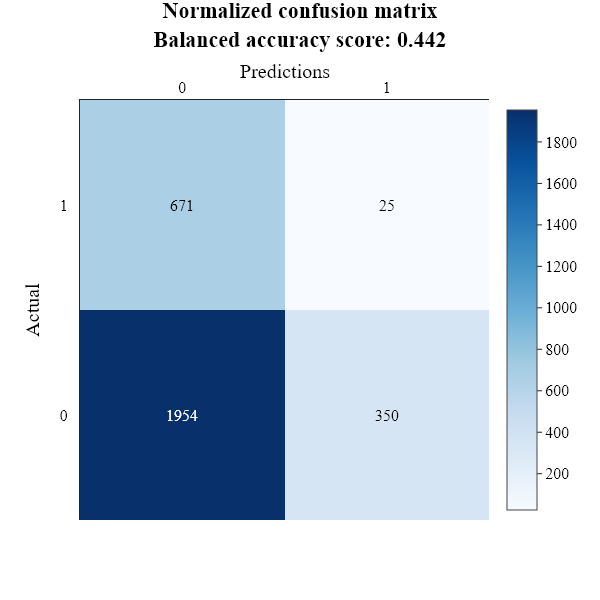

In [13]:
Plots_predictions.multilabel_conf_matrix(y_test_binary_classification, y_pred, labels=[i for i in np.unique(y_test_binary_classification)])

$\text{Confussion matrix does not look good at all! Let's check if something is wrong with our model, or whether the data is simply imbalanced.}$<p>

$\text{For a comparision we will use LogisticRegression algorithm from sklearn.}$

In [14]:
from sklearn.linear_model import LogisticRegression
model_sklearn = LogisticRegression(max_iter=1500)
y_train_binary_classification_sklearn = np.array(y_train_binary_classification).squeeze()
model_sklearn.fit(X_train_binary_classification, y_train_binary_classification_sklearn)
y_pred_sklearn = model_sklearn.predict(X_test_binary_classification)

In [15]:
print("Accuracy score sklearn: {}".format(accuracy_score(y_test_binary_classification, y_pred_sklearn)))

Accuracy score sklearn: 0.7693333333333333


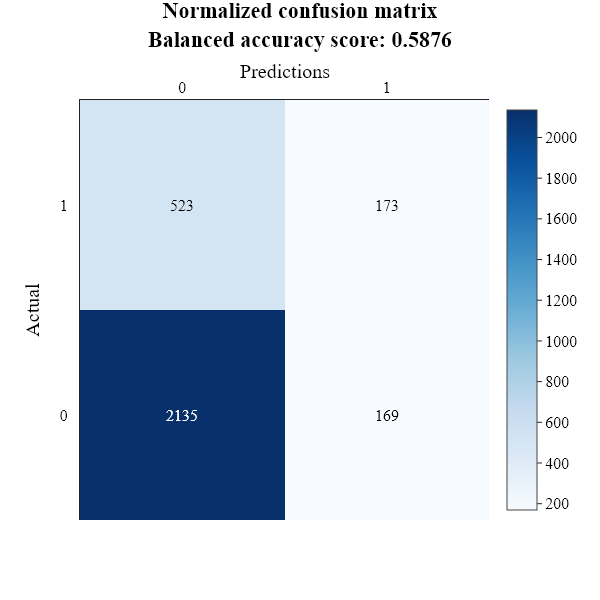

In [16]:
Plots_predictions.multilabel_conf_matrix(y_test_binary_classification, y_pred_sklearn, labels=[i for i in np.unique(y_test_binary_classification)])

$\text{Although both models achieve similar results in terms of overall accuracy, so in the case of balanced accuracy, the algorithms struggle to make the correct prediction for the minority class.}$

$\text{Let's get back to our model and verify some other metrics.}$

In [17]:
print("Roc AUC score: {}".format(np.round(roc_auc_score(y_true=y_test_binary_classification, y_score=y_prob), 5)))
report = classification_report(y_test_binary_classification, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
print(tabulate(df, headers="keys", tablefmt = 'psql'))

Roc AUC score: 0.50733
+--------------+-------------+-----------+------------+-------------+
|              |   precision |    recall |   f1-score |     support |
|--------------+-------------+-----------+------------+-------------|
| 0            |   0.744381  | 0.84809   |  0.792859  | 2304        |
| 1            |   0.0666667 | 0.0359195 |  0.0466853 |  696        |
| accuracy     |   0.659667  | 0.659667  |  0.659667  |    0.659667 |
| macro avg    |   0.405524  | 0.442005  |  0.419772  | 3000        |
| weighted avg |   0.587151  | 0.659667  |  0.619746  | 3000        |
+--------------+-------------+-----------+------------+-------------+


<h3>ROC Curve<h3>

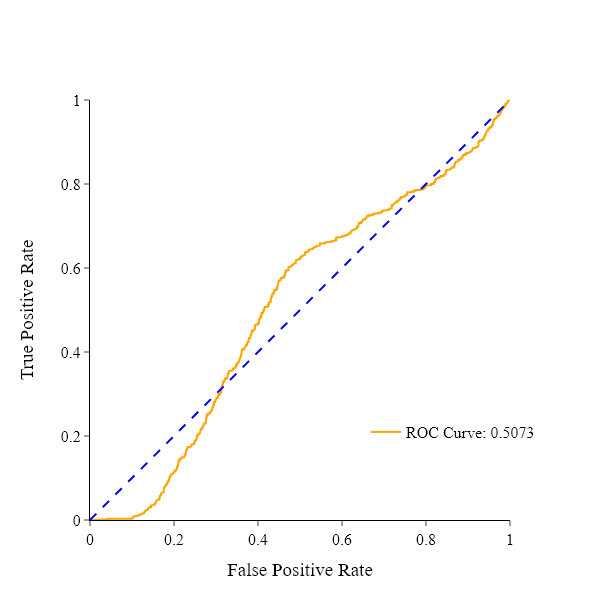

In [18]:
Plots_predictions.roc_auc_plot(y_true=y_test_binary_classification, y_prob=y_prob)

$\text{As we can see our ROC Curve looks really poor...}$

<h1> Multiclassification <h1>

$\text{Maybe Logisitc Regression will do slightly better on simple multiclassification task with iris data.}$

In [19]:
from sklearn.datasets import load_iris
data_multiclassification = load_iris(as_frame=True)['data']
data_multiclassification

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
y_multiclassification = load_iris(as_frame=True)['target']
y_multiclassification

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

<h2>Divide data<h2>

In [21]:
X_train_multiclassification, X_test_multiclassification, y_train_multiclassification, y_test_multiclassification = train_test_split(data_multiclassification, y_multiclassification, shuffle=True, random_state=17, test_size=0.2)

In [22]:
model = Logistic_Regression(fit_intercept=True, random_state=17, learning_rate=0.05, max_iter=5000)
model.fit(X_train_multiclassification, y_train_multiclassification, features_names=[str(i) for i in range(0, X_train_multiclassification.shape[1])], target_name=target_binary)
y_pred = model.predict(X_test_multiclassification)
y_prob = model.predict_proba(X_test_multiclassification)[:,1]

<h2>Evaluation and Visualization<h2>

In [23]:
print("Accuracy score: {}".format(accuracy_score(y_test_multiclassification, y_pred)))

Accuracy score: 0.8


<h3>Confussion matrix<h3>

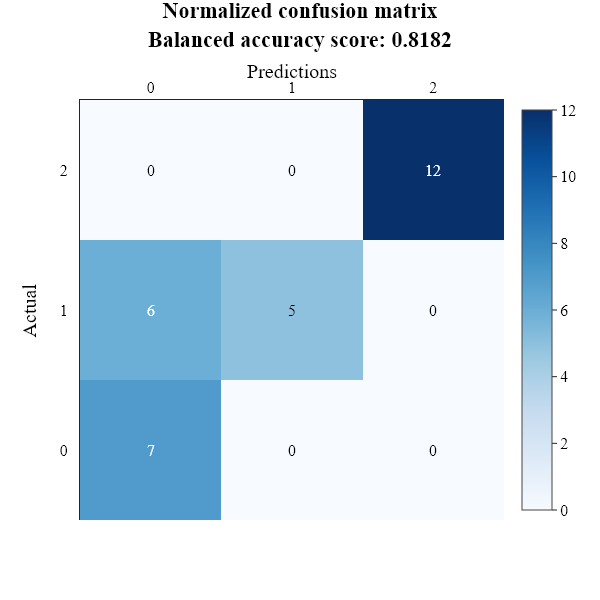

In [24]:
Plots_predictions.multilabel_conf_matrix(y_test_multiclassification, y_pred, labels=[i for i in np.unique(y_test_multiclassification)])

$\text{Although we have more classes our algorithm perform much better than before!}$

<h1>Advantages and disadvantages of Logistic Regression<h1>

$\text{Advantages of Logistic Regression:}$<p>
$\text{- Ease of implementation and interpretation of the results obtained,}$<p>
$\text{- The returned values of the coefficients can give information on the significance of the variables (as long as they have similar distributions),}$<p>
$\text{- Short compilation time.}$<br>

$\text{Disadvantages of Logistic Regression:}$<p>
$\text{- With a larger number of variables, over-fitting problems arise,}$<p>
$\text{- The assumption of linearity between the dependent variable and the independent variables.}$